In [1]:
import math
import matplotlib.pyplot as plt
import scipy.constants as cns
import numpy as np
from scipy import integrate
from scipy.integrate import quad
%matplotlib inline

In [2]:
# Lecture 17 Problem

In [3]:
# A Spherical Proportional Counter
# Considering the spherical TPC discussed in the last lecture notes, but now operated as a proportional 
# counter. Use Townsends approximation for α with A=12 and B=180 (conventional values for argon) to 
# calculate the total gain of the system as a function of applied high voltage, for events originating at 
# the cathode. Make a plot of the dependence of gain upon high voltage for an outer sphere of radius 1m, 
# given an inner sphere of diameter 1cm and 5cm respectively. You will likely need to solve for the total 
# gain with a numerical integration in e.g. Python or Mathematica.

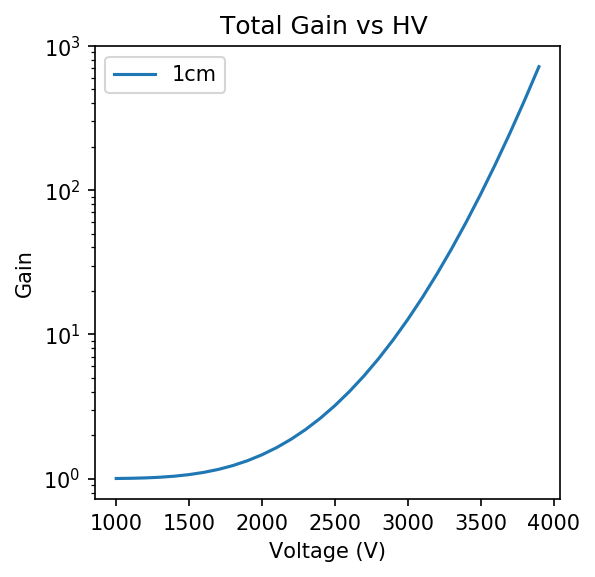

In [4]:
A = 12
B = 180
p = 100   # Torr

r1 = 0.5    # cm
r2 = 100    # cm
r3 = 2.5    # cm

v1 = np.arange(1000, 4000, 100)


# The following function will be used to input E into alpha

def f(r, r1, r2, v, A, B, p):
    
    #E =(v/(r**2) * (1/((1/r2)-(1/r1)))
    E=(v/(r**2))*((r1*r2)/(r2-r1))
    g = r*A*p*np.exp(-(B*p)/E) 
    
    return g

# Gain
# I1 = quad(f, r1, r2, args = (r1,r2,v,A,B,p))[0]
# g1 = np.exp(I1)
# f takes a list of all values possible from v1, this wont work


# Gain
gain1 = []
for v in v1:
    I1 = quad(f, r1, r2, args = (r1,r2,v,A,B,p))[0]
    g1 = np.exp(I1)
    gain1.append(g1)


plt.figure(figsize=(4,4), dpi=150)

plt.plot(v1, gain1, '-', label='1cm', color='tab:blue')
plt.yscale('log')
plt.legend(loc='upper left')
plt.title('Total Gain vs HV ')
plt.ylabel('Gain')
plt.xlabel('Voltage (V)')
plt.show()

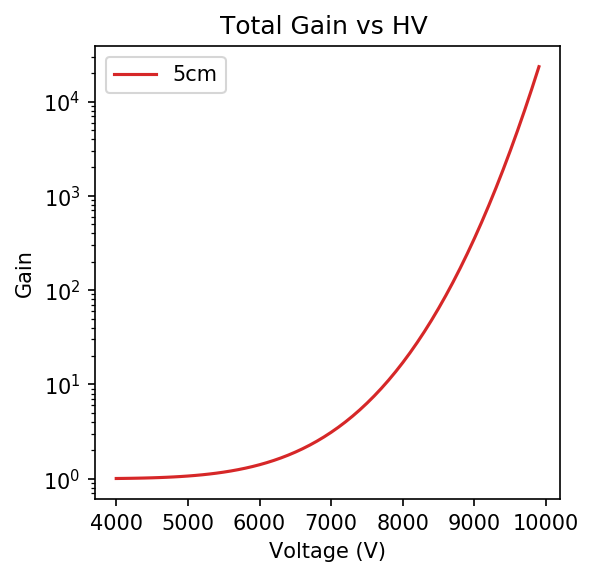

In [5]:
A = 12
B = 180
p = 100   # Torr

r1 = 0.5    # cm
r2 = 100    # cm
r3 = 2.5    # cm

v2 = np.arange(4000, 10000, 100)


# The following function will be used to input E into alpha

def f(r, r1, r2, v, A, B, p):
    
    E=(v/(r**2))*((r1*r2)/(r2-r1))
    g = r*A*p*np.exp(-(B*p)/E) 
    
    return g

# Gain
gain2 = []
for v in v2:
    I2 = quad(f, r3, r2, args = (r3,r2,v,A,B,p))[0]
    g2 = np.exp(I2)
    gain2.append(g2)


plt.figure(figsize=(4,4), dpi=150)

plt.plot(v2, gain2, '-', label='5cm', color='tab:red')
plt.yscale('log')
plt.legend(loc='upper left')
plt.title('Total Gain vs HV ')
plt.ylabel('Gain')
plt.xlabel('Voltage (V)')
plt.show()

In [6]:
# Lecture 18 Problem

In [7]:
# Consider a GEM foil of thickness 50 micrometers biased at V operated in Blargon at 1 atm of pressure. 
# Blargon has a W-Value for photon production of 20 eV, and Townsend A and B parameneters of 
# A=11cm-e torr-1, B=160V/(cmTorr).

# 1) At what applied voltage will the gain mechanism transition from electroluminiscent to avalanche mode? 
#    (you canq consider that it is operating in avalanche mode when at the expected rate of secondary 
#    electron production is at least one electron per gap distance, or charge gain G~2)

# 2) Show that at about twice the avalanche threshold voltage, the charge gain is approximately G~350

# 3) Just below the avalanche threshold voltage, use an argument of energy conservation to explain 
#    why the electroluminiscient gain (to photons) should be around G~8

In [8]:
d = 0.005  # cm
p = 760        # Torr (problem has 1atm = 760 Torr)
W = 20         # eV
A = 11         # cm-1 Torr-1
B = 160        # V / (cmTorr)
V = np.arange(1, 1000, 0.1)

In [9]:
E = V/d
alpha = A * p * np.exp(- (B*p) / E ) 
Gain = np.exp(alpha * d)

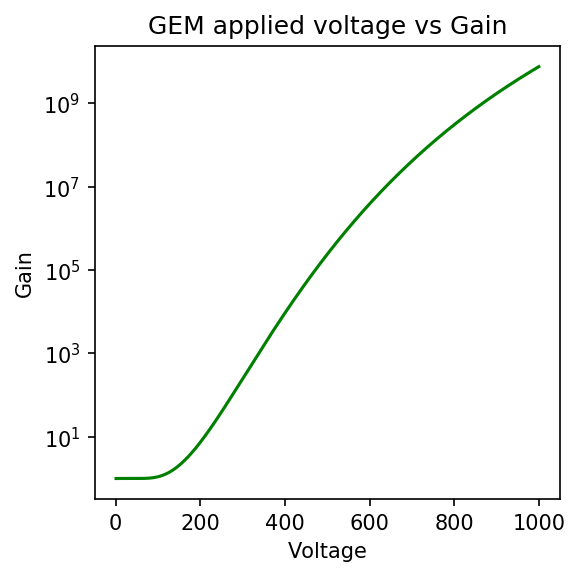

In [10]:
# 1)

plt.figure(figsize=(4,4), dpi=150)

plt.plot(V, Gain, '-', color='green')
plt.yscale('log')
#plt.legend(loc='upper left')
plt.title('GEM applied voltage vs Gain')
plt.ylabel('Gain')
plt.xlabel('Voltage')
plt.show()

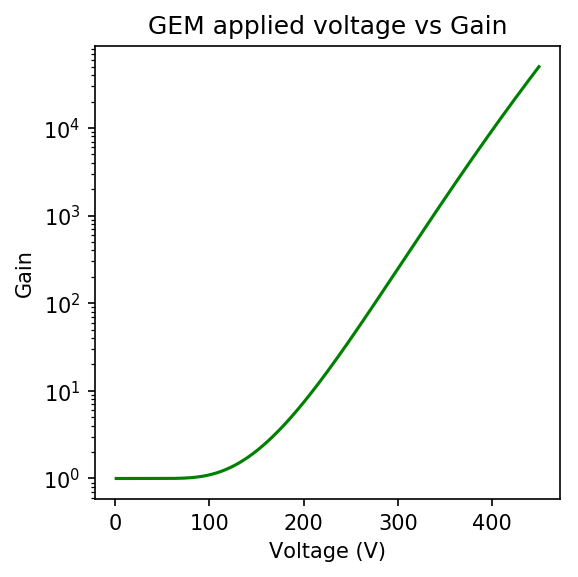

In [11]:
# Gain up to 10^4 (to avoid sparking issues), which looks around to have a voltage of ~400:

d = 0.005  # cm
p = 760        # Torr (problem has 1atm = 760 Torr)
W = 20         # eV
A = 11         # cm-1 Torr-1
B = 160        # V / (cmTorr)
V = np.arange(1, 450, 0.1)

E = V/d
alpha = A * p * np.exp(- (B*p) / E ) 
Gain = np.exp(alpha * d)

# 1)

plt.figure(figsize=(4,4), dpi=150)

plt.plot(V, Gain, '-', color='green')
plt.yscale('log')
#plt.legend(loc='upper left')
plt.title('GEM applied voltage vs Gain')
plt.ylabel('Gain')
plt.xlabel('Voltage (V)')
plt.show()

In [12]:
# Lecture 21 Problem

In [13]:
# Plot the power radiated into a cavity of volume 1 m^3 for an axion coupling gayy ~ 10^-15 by an 
# axion on resonance as a function of its mass. Assume Cnlm = 1 and use the parameters of the 
# ADMX experiment: Q~500,000 and B=8T.

# 1m^3 = 1000L

In [14]:
V = 1000 / 136                     # L
B = (8 / 6.8 )**2                  # T
C = 1 / 0.4                        # Unitless
g = (10**-15 / 0.97)**2            # Unitless
rho = 1.5 / 0.45                   # GeV/cm^3

c = 3*10**8
h = 4.135 * 10**-15      # eV/s
m = np.arange(1e-7, 1e-3, 1e-6)
#m = np.arange(2.6e-6, 3.4e-6, 1e-9)
f =  (m / h) / 650000000           # MHz
Q =  500000 / 50000                # Unitless

In [15]:
P = (1.9 * 10**-22) * V * B * C * g * rho * f * Q

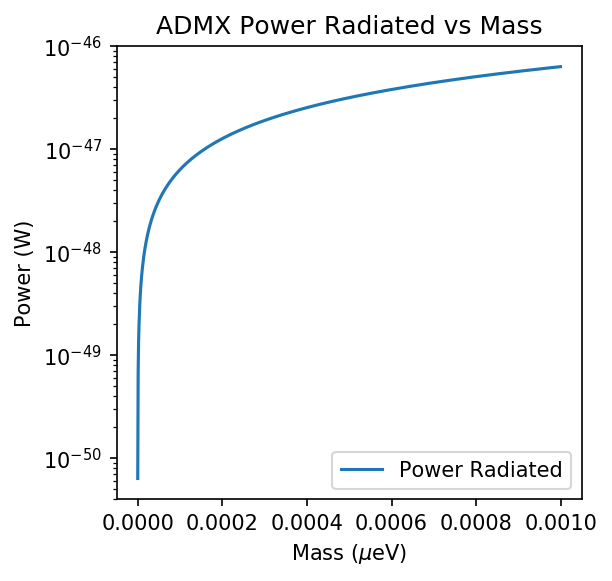

In [16]:
plt.figure(figsize=(4,4), dpi=150)

plt.plot(m, P, '-', label='Power Radiated', color='tab:blue')
plt.yscale('log')
plt.legend(loc='lower right')
plt.title('ADMX Power Radiated vs Mass')
plt.ylabel('Power (W)')
plt.xlabel(r'Mass ($\mu$eV)')
plt.show()

In [17]:
# Silicon Detectors Problem
# What is the equilibrium concentration ni?

In [18]:
# 300K

B = 7.3 * 10**15    # cm^-3 K^-3/2
T = 300             # K
Eg = 1.12           # eV
k = 8.61 * 10**-5   # eV * K^-1

ni = B * T**(3/2) * np.exp(-(Eg/(2*k*T)))

print('ni =', ni,'cm^-3', 'at 300K')

ni = 14568210851.613613 cm^-3 at 300K


In [19]:
# 50K

B = 7.3 * 10**15    # cm^-3 K^-3/2
T = 50             # K
Eg = 1.12           # eV
k = 8.61 * 10**-5   # eV * K^-1

ni = B * T**(3/2) * np.exp(-(Eg/(2*k*T)))

print('ni =', ni,'cm^-3', 'at 50K')

ni = 8.282982136493868e-39 cm^-3 at 50K
